In [1]:
! pip install -q kaggle

from google.colab import files

! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d kmader/skin-cancer-mnist-ham10000

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.8/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.8/dist-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [2]:
!unzip ./skin-cancer-mnist-ham10000.zip -d ./skin-mnist

unzip:  cannot find or open ./skin-cancer-mnist-ham10000.zip, ./skin-cancer-mnist-ham10000.zip.zip or ./skin-cancer-mnist-ham10000.zip.ZIP.


In [3]:
import numpy as np
import pandas as pd
import os

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv("/content/drive/MyDrive/final year project/datasets/skin_mnist/HAM10000_metadata (1).csv")
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [6]:
df.drop_duplicates('lesion_id', inplace=True)

In [7]:
df['dx'].value_counts()

nv       5403
bkl       727
mel       614
bcc       327
akiec     228
vasc       98
df         73
Name: dx, dtype: int64

In [8]:
folder_1 = os.listdir('/content/drive/MyDrive/final year project/datasets/skin_mnist/ham10000_images_part_1')
folder_2 = os.listdir('/content/drive/MyDrive/final year project/datasets/skin_mnist/ham10000_images_part_2')

In [9]:
class_list = ['nv', 'bkl', 'mel']

In [10]:
balanced_df = df[df['dx'].isin(class_list)]

In [13]:
import seaborn as sns
sns.set(style="whitegrid", font_scale=2.0)


In [17]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

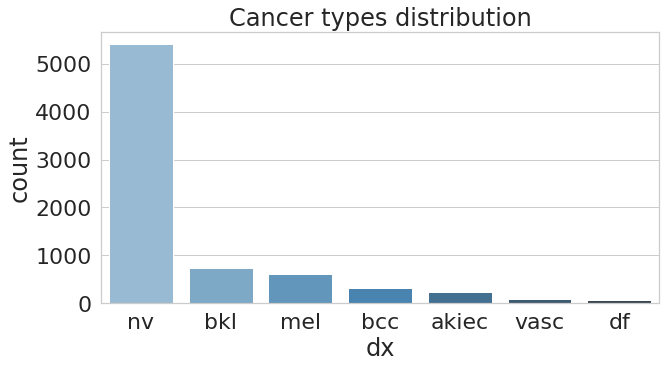

In [18]:
pyplot.subplots(figsize=(10, 5))
sns.countplot(x ='dx', data = df, palette = 'Blues_d', order = df['dx'].value_counts().index).set_title("Cancer types distribution")
plt.show()

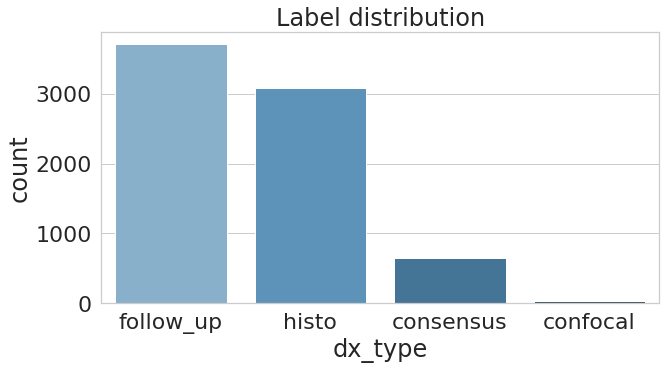

In [19]:
pyplot.subplots(figsize=(10, 5))
sns.countplot(x ='dx_type', data = df, palette = 'Blues_d', order = df['dx_type'].value_counts().index).set_title("Label distribution")
plt.show()


AGE DISTRIBUTION

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


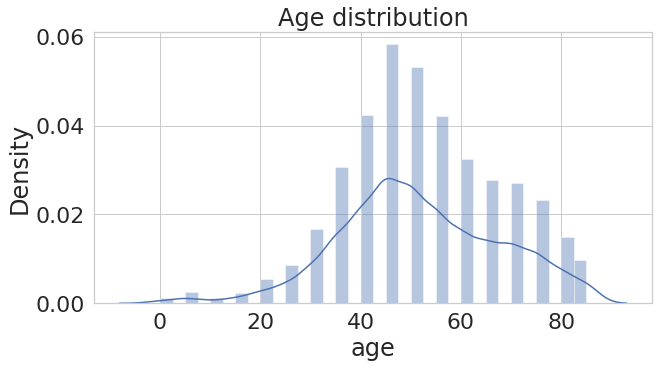

In [20]:
pyplot.subplots(figsize=(10, 5))
sns.distplot(df['age'].dropna()).set_title("Age distribution")
plt.show()


GENDER

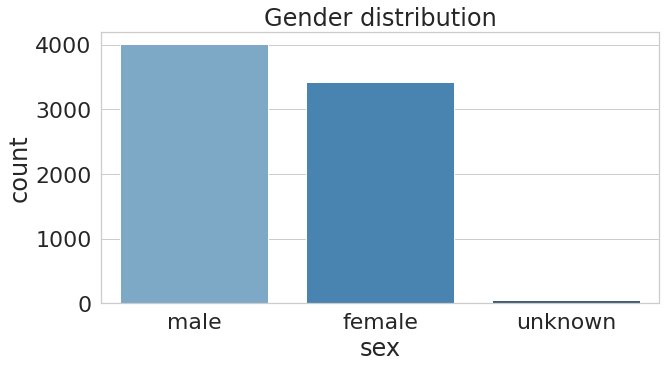

In [21]:
pyplot.subplots(figsize=(10, 5))
sns.countplot(x ='sex', data = df, palette = 'Blues_d').set_title("Gender distribution")
plt.show()



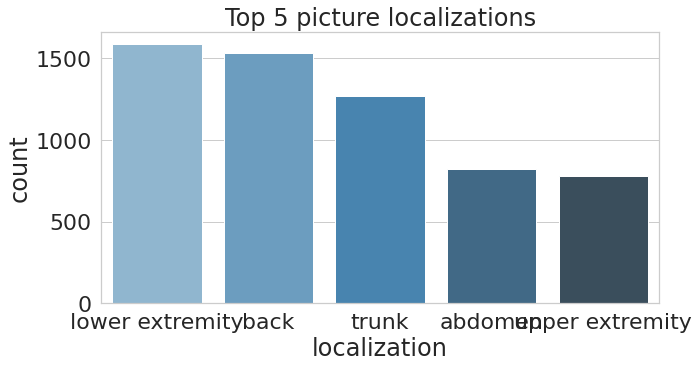

In [22]:
pyplot.subplots(figsize=(10, 5))
sns.countplot(x ='localization', data = df, palette = 'Blues_d', order = df['localization'].value_counts().iloc[:5].index).set_title("Top 5 picture localizations")
plt.show()

In [ ]:
len_gen = (n for n in [545, 558, 572])
balanced_df = balanced_df.groupby('dx').apply(lambda x: x.sample(next(len_gen)))

In [ ]:
def generate_img_path(x):
  if x + '.jpg' in folder_1:
    return 'ham10000_images_part_1/' + x + '.jpg'
  if x + '.jpg' in folder_2:
    return 'ham10000_images_part_2/' + x + '.jpg'

balanced_df['image_path'] = balanced_df['image_id'].apply(generate_img_path)

In [ ]:
balanced_df = balanced_df[[ 'lesion_id', 'image_id', 'image_path', 'dx']]

In [ ]:
dummy = pd.get_dummies(balanced_df['dx'])
for label in class_list:
  balanced_df[label] = dummy[label]

In [ ]:
balanced_df = balanced_df.rename(columns={'dx': 'label'})

In [ ]:
balanced_df = balanced_df.sample(frac=1).reset_index(drop=True)


In [ ]:
balanced_df.to_csv("/content/drive/MyDrive/final year project/datasets/skin_mnist/final_metadata.csv")

In [ ]:
!rm -rf ./skin-mnist/HAM10000_images_part_*

In [ ]:
!cp -r ./skin-mnist/ ./drive/'My Drive'/ML_Club/Projects/grad_cam/datasets/

cp: cannot stat './skin-mnist/': No such file or directory


In [ ]:
final_path = '/content/drive/MyDrive/final year project/datasets/skin_mnist/final_metadata.csv'

In [ ]:
df = pd.read_csv(final_path)

In [ ]:
df.head()

,Unnamed: 0,lesion_id,image_id,image_path,label,nv,bkl,mel
0,0,HAM_0006955,ISIC_0025105,ham10000_images_part_1/ISIC_0025105.jpg,mel,0,0,1
1,1,HAM_0001847,ISIC_0024792,ham10000_images_part_1/ISIC_0024792.jpg,mel,0,0,1
2,2,HAM_0002076,ISIC_0024720,ham10000_images_part_1/ISIC_0024720.jpg,nv,1,0,0
3,3,HAM_0004072,ISIC_0032130,ham10000_images_part_2/ISIC_0032130.jpg,nv,1,0,0
4,4,HAM_0005869,ISIC_0029249,ham10000_images_part_1/ISIC_0029249.jpg,bkl,0,1,0


In [ ]:
balanced_df = df
def path_adder(x):
    return  x[1:] 
balanced_df['image_path'] = df['image_path'].apply(path_adder)

In [ ]:
df['image_path'][1]

'am10000_images_part_1/ISIC_0024792.jpg'

In [ ]:
balanced_df

,Unnamed: 0,lesion_id,image_id,image_path,label,nv,bkl,mel
0,0,HAM_0006955,ISIC_0025105,am10000_images_part_1/ISIC_0025105.jpg,mel,0,0,1
1,1,HAM_0001847,ISIC_0024792,am10000_images_part_1/ISIC_0024792.jpg,mel,0,0,1
2,2,HAM_0002076,ISIC_0024720,am10000_images_part_1/ISIC_0024720.jpg,nv,1,0,0
3,3,HAM_0004072,ISIC_0032130,am10000_images_part_2/ISIC_0032130.jpg,nv,1,0,0
4,4,HAM_0005869,ISIC_0029249,am10000_images_part_1/ISIC_0029249.jpg,bkl,0,1,0
...,...,...,...,...,...,...,...,...
1670,1670,HAM_0004569,ISIC_0031495,am10000_images_part_2/ISIC_0031495.jpg,bkl,0,1,0
1671,1671,HAM_0002723,ISIC_0034243,am10000_images_part_2/ISIC_0034243.jpg,mel,0,0,1
1672,1672,HAM_0007102,ISIC_0030031,am10000_images_part_2/ISIC_0030031.jpg,mel,0,0,1
1673,1673,HAM_0003176,ISIC_0028148,am10000_images_part_1/ISIC_0028148.jpg,mel,0,0,1


In [ ]:
balanced_df.reset_index(drop=True, inplace=True)

In [ ]:
balanced_df

,Unnamed: 0,lesion_id,image_id,image_path,label,nv,bkl,mel
0,0,HAM_0006955,ISIC_0025105,am10000_images_part_1/ISIC_0025105.jpg,mel,0,0,1
1,1,HAM_0001847,ISIC_0024792,am10000_images_part_1/ISIC_0024792.jpg,mel,0,0,1
2,2,HAM_0002076,ISIC_0024720,am10000_images_part_1/ISIC_0024720.jpg,nv,1,0,0
3,3,HAM_0004072,ISIC_0032130,am10000_images_part_2/ISIC_0032130.jpg,nv,1,0,0
4,4,HAM_0005869,ISIC_0029249,am10000_images_part_1/ISIC_0029249.jpg,bkl,0,1,0
...,...,...,...,...,...,...,...,...
1670,1670,HAM_0004569,ISIC_0031495,am10000_images_part_2/ISIC_0031495.jpg,bkl,0,1,0
1671,1671,HAM_0002723,ISIC_0034243,am10000_images_part_2/ISIC_0034243.jpg,mel,0,0,1
1672,1672,HAM_0007102,ISIC_0030031,am10000_images_part_2/ISIC_0030031.jpg,mel,0,0,1
1673,1673,HAM_0003176,ISIC_0028148,am10000_images_part_1/ISIC_0028148.jpg,mel,0,0,1


In [ ]:
balanced_df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)


In [ ]:
balanced_df

,lesion_id,image_id,image_path,label,nv,bkl,mel
0,HAM_0006955,ISIC_0025105,am10000_images_part_1/ISIC_0025105.jpg,mel,0,0,1
1,HAM_0001847,ISIC_0024792,am10000_images_part_1/ISIC_0024792.jpg,mel,0,0,1
2,HAM_0002076,ISIC_0024720,am10000_images_part_1/ISIC_0024720.jpg,nv,1,0,0
3,HAM_0004072,ISIC_0032130,am10000_images_part_2/ISIC_0032130.jpg,nv,1,0,0
4,HAM_0005869,ISIC_0029249,am10000_images_part_1/ISIC_0029249.jpg,bkl,0,1,0
...,...,...,...,...,...,...,...
1670,HAM_0004569,ISIC_0031495,am10000_images_part_2/ISIC_0031495.jpg,bkl,0,1,0
1671,HAM_0002723,ISIC_0034243,am10000_images_part_2/ISIC_0034243.jpg,mel,0,0,1
1672,HAM_0007102,ISIC_0030031,am10000_images_part_2/ISIC_0030031.jpg,mel,0,0,1
1673,HAM_0003176,ISIC_0028148,am10000_images_part_1/ISIC_0028148.jpg,mel,0,0,1


In [ ]:
balanced_df = pd.read_csv(final_path)
balanced_df.drop(balanced_df.columns[balanced_df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)


In [ ]:
balanced_df

,lesion_id,image_id,image_path,label,nv,bkl,mel
0,HAM_0006955,ISIC_0025105,ham10000_images_part_1/ISIC_0025105.jpg,mel,0,0,1
1,HAM_0001847,ISIC_0024792,ham10000_images_part_1/ISIC_0024792.jpg,mel,0,0,1
2,HAM_0002076,ISIC_0024720,ham10000_images_part_1/ISIC_0024720.jpg,nv,1,0,0
3,HAM_0004072,ISIC_0032130,ham10000_images_part_2/ISIC_0032130.jpg,nv,1,0,0
4,HAM_0005869,ISIC_0029249,ham10000_images_part_1/ISIC_0029249.jpg,bkl,0,1,0
...,...,...,...,...,...,...,...
1670,HAM_0004569,ISIC_0031495,ham10000_images_part_2/ISIC_0031495.jpg,bkl,0,1,0
1671,HAM_0002723,ISIC_0034243,ham10000_images_part_2/ISIC_0034243.jpg,mel,0,0,1
1672,HAM_0007102,ISIC_0030031,ham10000_images_part_2/ISIC_0030031.jpg,mel,0,0,1
1673,HAM_0003176,ISIC_0028148,ham10000_images_part_1/ISIC_0028148.jpg,mel,0,0,1


In [ ]:
test_set = balanced_df.sample(40)
train_set = balanced_df.drop(test_set.index)
val_set = train_set.sample(335)
train_set = train_set.drop(val_set.index)


In [ ]:
len(test_set), len(train_set), len(val_set)

(40, 1300, 335)

In [ ]:
train_set.head()

,lesion_id,image_id,image_path,label,nv,bkl,mel
0,HAM_0006955,ISIC_0025105,ham10000_images_part_1/ISIC_0025105.jpg,mel,0,0,1
1,HAM_0001847,ISIC_0024792,ham10000_images_part_1/ISIC_0024792.jpg,mel,0,0,1
2,HAM_0002076,ISIC_0024720,ham10000_images_part_1/ISIC_0024720.jpg,nv,1,0,0
3,HAM_0004072,ISIC_0032130,ham10000_images_part_2/ISIC_0032130.jpg,nv,1,0,0
5,HAM_0007044,ISIC_0024501,ham10000_images_part_1/ISIC_0024501.jpg,nv,1,0,0


In [ ]:
test_set.head()

In [ ]:
train_set.to_csv('/content/drive/MyDrive/final year project/datasets/skin_mnist/final_train.csv')

In [ ]:
test_set.to_csv('/content/drive/MyDrive/final year project/datasets/skin_mnist/final_test.csv')

In [ ]:
val_set.to_csv('/content/drive/MyDrive/final year project/datasets/skin_mnist/final_val.csv')

In [ ]:
train_dataset = pd.read_csv('/content/drive/MyDrive/final year project/datasets/skin_mnist/final_train.csv')